# Assignment: 2D Coordinate System Transformation
## Objective
Your task is to implement a Python library able to perform a series of 2D transformations on a set of points. You will apply translation and rotation transformations using matrix operations. This assignment will help you understand how to manipulate and transform coordinate systems using matrices as well as how to define operators in your own objects.

## Background
In 2D space, points can be transformed (translated, rotated, scaled) using transformation matrices. For this assignment, you will focus on translation and rotation transformations.

### Translation
A point $P(x,y)$ can be translated by $\Delta x$ and $\Delta y$ using the translation matrix:
$$
\begin{bmatrix}
1 & 0 & \Delta x \\
0 & 1 & \Delta y \\
0 & 0 & 1
\end{bmatrix}
$$
### Rotation:
A point $P(x,y)$ can be rotated by $\theta$ using the rotation matrix:
$$
\begin{bmatrix}
\cos \theta & -\sin \theta & 0 \\
\sin \theta & \cos \theta & 0 \\
0 & 0 & 1
\end{bmatrix}
$$
 > Angles are measured in radians.

### Tranformations:

Is it possible to combine both operations using an homogeneous transformation matrix, that looks like this:

$$
\begin{bmatrix}
\cos \theta & -\sin \theta & \Delta x \\
\sin \theta & \cos \theta & \Delta y \\
0 & 0 & 1
\end{bmatrix}
$$

## Task Description

* **Define Point2D class:** Define a class for 2D points. You can use homogeneous points $[x, y, 1]^T$. Define the operation '`+`' and '`-`' with other points as well as the logical operators '`<`' '`==`'. Check the types.
* **Define Translate class:** Define a class to tranlate the points in the x-direction and y-direction. Use a 3x3 translation matrix to perform the operation. Consider the operators '`+`' and '`-`' with other `Translation` objects as well as the '`*`' to translate `Point2D` objects (e.g., `p2 = t*p1`). Check the types.
* **Define Rotation class:** Define a class to rotate the points $\theta$ radians. Use a 3x3 rotation matrix to perform the operation. Consider the operators '`+`' and '`-`' with other `Rotation` objects as well as the '`*`' to rotate `Point2D` objects (e.g., `p2 = r1 * p1`).  Check the types.
* **Define Transformation class:** Creata a Transformation object that requires in the constructor a `Translation` and a `Rotation` object. Define only the '`*`' operator to apply the transformation to a `Point2D` object and *optionally* to other `Transformation` objects. Check the types.
* Additionally, use the `matplotlib` library to plot the points. To do it, include a method `plot()` in the `Point2D` class to plot the points as shown in the tests.

In [24]:

import numpy as np
from matplotlib import pyplot as plt


class Point2D:
    """ This class defines 2D points as homogeneous points . 
    it defines the operation '+' and '-' with other points as well as the logical operators '<' '==' . 
    it also defines the method 'plot()' to plot the points defined in the class."""
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        self.homogeneous = np.array([x, y, 1])

    def __add__(self, other):
        if isinstance(other, Point2D):
            return Point2D(self.x + other.x, self.y + other.y)
        return NotImplemented

    def __sub__(self, other):
        if isinstance(other, Point2D):
            return Point2D(self.x - other.x, self.y - other.y)
        return NotImplemented

    def __lt__(self, other):
        if isinstance(other, Point2D):
            return (self.x, self.y) < (other.x, other.y)
        return NotImplemented

    def __eq__(self, other):
        if isinstance(other, Point2D):
            return (self.x, self.y) == (other.x, other.y)
        return NotImplemented

    def __repr__(self):
        return f"Point2D({self.x}, {self.y})"

    def plot(self, color='r'):
        plt.scatter(self.x, self.y, c=color)
        plt.text(self.x, self.y, f'({self.x:.2f}, {self.y:.2f})', fontsize=9, ha='right')


class Translate:
    """ This class defines tranlation of the points in the x-direction and y-direction using a 3x3 translation matrix to perform the operation. 
    It also defines the following operators '+' and '-' with other Translation objects as well as the '*' to translate 2D points. """
    def __init__(self, dx, dy):
        self.dx = dx
        self.dy = dy
        self.matrix = np.array([
            [1, 0, dx],
            [0, 1, dy],
            [0, 0, 1]
        ])

    def __add__(self, other):
        if isinstance(other, Translate):
            return Translate(self.dx + other.dx, self.dy + other.dy)
        return NotImplemented

    def __sub__(self, other):
        if isinstance(other, Translate):
            return Translate(self.dx - other.dx, self.dy - other.dy)
        return NotImplemented

    def __mul__(self, point):
        if isinstance(point, Point2D):
            new_coords = self.matrix @ point.homogeneous
            return Point2D(new_coords[0], new_coords[1])
        return NotImplemented

    def __repr__(self):
        return f"Translate(dx={self.dx:.2f}, dy={self.dy:.2f})"


class Rotate:
    """ This class defines The rotation of a point W.R.T angle theta. the class uses a 3x3 rotation matrix to perform the operation.
     the class considers the following operators '+' and '-' with other Rotation objects as well as the '*' to rotate 2D Points """
    def __init__(self, theta):
        self.theta = theta
        self.matrix = np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]
        ])

    def __add__(self, other):
        if isinstance(other, Rotate):
            return Rotate(self.theta + other.theta)
        return NotImplemented

    def __sub__(self, other):
        if isinstance(other, Rotate):
            return Rotate(self.theta - other.theta)
        return NotImplemented

    def __mul__(self, point):
        if isinstance(point, Point2D):
            new_coords = self.matrix @ point.homogeneous
            return Point2D(new_coords[0], new_coords[1])
        return NotImplemented

    def __repr__(self):
        return f"Rotate(theta={self.theta:.2f})"


class Transformation:
    """ This class creates a Transformation object that requires Translation matrix and a Rotation matrix to calculate the transfomation matrix. 
    This class only defines the '*' operator to apply the transformation to a 2D point and to other Transformations """
    def __init__(self, translation, rotation):
        self.translation = translation
        self.rotation = rotation
        self.matrix = self.rotation.matrix @ self.translation.matrix

    def __mul__(self, point):
        if isinstance(point, Point2D):
            new_coords = self.matrix @ point.homogeneous
            return Point2D(new_coords[0], new_coords[1])
        elif isinstance(point, Transformation):
            new_matrix = self.matrix @ point.matrix
            new_translation = Translate(new_matrix[0, 2], new_matrix[1, 2])
            new_rotation = Rotate(np.arctan2(new_matrix[1, 0], new_matrix[0, 0]))
            return Transformation(new_translation, new_rotation)
        return NotImplemented

    def __repr__(self):
        return f"Transformation(translation={self.translation}, rotation={self.rotation})"














## Test Your code!
Use the tests defined here to check the correctness of your code. The tests are based on the example provided in the next cell. The example shows how the classes and operators should be used to perform the transformations. The tests will check if the classes and operators are implemented correctly.

Point2D(2, 4)
Point2D(3, 6)
Point2D(0, 0)
Point2D(1, 2)
Translate(dx=1.00, dy=0.00) Rotate(theta=0.39) Transformation(translation=Translate(dx=1.00, dy=0.00), rotation=Rotate(theta=0.39))
Point2D(0, 0)
Point2D(1, 2)
Point2D(2, 4)
Point2D(3, 6)
Point2D(6, 12)
Translate(dx=2.00, dy=0.00)
Rotate(theta=0.79)


(-0.20803559776909009,
 4.221479496824631,
 -0.36523826042832147,
 7.491432040423321)

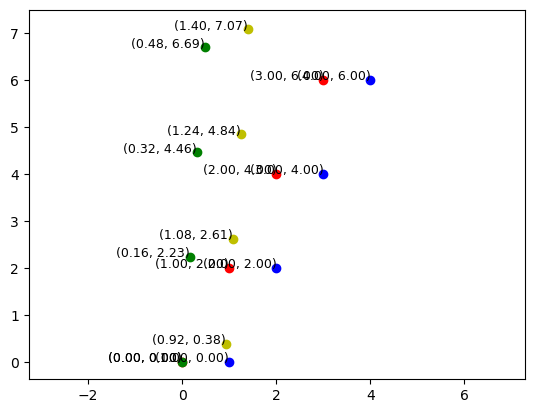

In [25]:
# Set up the points
points = [Point2D(2, 4), Point2D(3, 6), Point2D(), Point2D(1, 2)]
for p in points:
    print(p)

# Set up the transformations
t1 = Translate(1, 0)
r1 = Rotate(np.pi/8)
T1 = Transformation(t1, r1)
print(t1, r1, T1)

# Do operations with points
points.sort()
p_total = Point2D()
for p in points:
    p_total = p_total + p
    print(p)
print(p_total)

# Do operations with transformations
print(t1+t1)
print(r1+r1)
for p in points:
    p.plot('r')   # color red
    p_t = t1 * p
    p_t.plot('b') # color blue
    p_r = r1 * p
    p_r.plot('g') # color green
    p_T = T1 * p
    p_T.plot('y') # color yellow

plt.axis('equal')   

## Deliberable

Put your code in a Python project with all the required files (e.g., `README.md`, `requirements.txt`, `LICENSE`, etc.). Include alse several tests. Upload it to Github and submit the link to Moodle.